<a href="https://colab.research.google.com/github/jitendramalipeddi/Movie_recommender/blob/master/Audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory data analysis

In [1]:
!pip install librosa
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display

In [2]:
filename='/content/drive/MyDrive/final year project/UrbanSound8K/audio/fold1/101415-3-0-2.wav'

In [3]:
!dir

drive  sample_data


# Dog barking sound

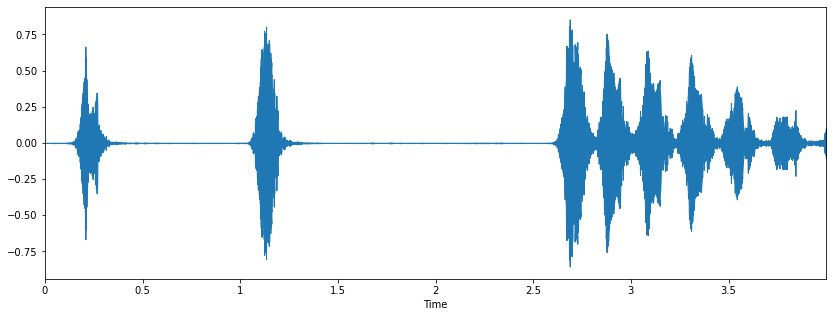

In [4]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

# sampling rate of the audio file

In [5]:
sample_rate


22050

# Reading the data csv file

In [6]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/final year project/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


# Overview of classes

In [7]:
metadata['class'].value_counts()

jackhammer          1000
drilling            1000
air_conditioner     1000
children_playing    1000
street_music        1000
dog_bark            1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Sample extraction of MFCC features of an audio 

In [8]:
import librosa
audio_file_path='/content/drive/MyDrive/final year project/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [9]:
print(librosa_audio_data)

[-0.00011783 -0.00017157 -0.00017749 ... -0.04598654 -0.04624664
 -0.05089863]


In [10]:
print(librosa_audio_data.shape)

(88200,)


#  Plot of monochannel

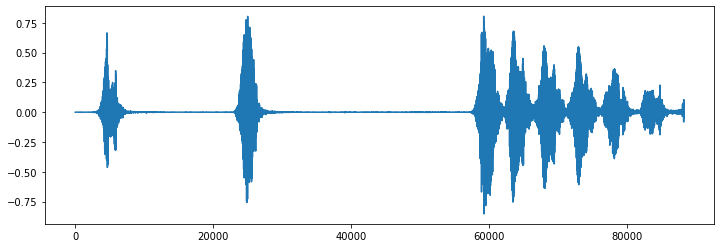

In [11]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

smaple mfcc features of a single audio 


In [12]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [13]:
mfccs

array([[-5.2127631e+02, -5.1920068e+02, -5.1859546e+02, ...,
        -4.3563806e+02, -3.9264105e+02, -3.5284695e+02],
       [ 1.4337622e+01,  1.7177921e+01,  1.8103882e+01, ...,
         1.1375925e+02,  1.5130569e+02,  1.7731265e+02],
       [ 1.3526174e+01,  1.6120741e+01,  1.7259270e+01, ...,
         6.4274483e+01,  6.2837280e+01,  5.8452560e+01],
       ...,
       [ 3.5389400e-01, -3.3235970e+00, -4.8356538e+00, ...,
        -5.2698832e+00, -1.1491921e+00, -1.8506811e+00],
       [ 4.5192480e-01, -3.0670590e+00, -4.6473045e+00, ...,
        -3.4223983e+00,  2.5510237e+00,  1.9448149e+00],
       [ 4.3578243e-01, -2.7977815e+00, -4.4126105e+00, ...,
        -2.6713738e+00,  1.3704147e+00,  5.2174580e-01]], dtype=float32)

In [2]:
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/final year project/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/final year project/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


a function to create mfcc features of all the audio files in dataset

In [3]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [16]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [22:17,  2.95it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [56:05,  2.69it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [56:06,  3.45it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [58:59,  2.47it/s]


In [17]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [18]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [19]:
X.shape

(8732, 40)

In [20]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [21]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233369e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530842e+00, -8.9652115e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321606e+00]], dtype=float32)

In [25]:
X_train.shape

(6985, 40)

In [26]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
y_train.shape

(6985, 10)

In [29]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [31]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/final year project/UrbanSound8K/saved_models/audio_classification.hdf5')

In [32]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [35]:
test_accuracy=new_model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7618774771690369


In [40]:
filename="/content/drive/MyDrive/final year project/UrbanSound8K/audio/fold4/102102-3-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=new_model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.9111667e+02  1.1167530e+02 -5.3118294e+01  8.8882723e+00
 -2.0572830e+01  5.9435481e-01 -6.9844055e+00  4.6873627e+00
 -6.4918303e+00  1.4485286e+01 -6.4120531e+00  1.8988726e+01
 -1.0654182e+01  1.0280035e+01 -8.7009621e+00  3.3845756e+00
 -7.2866340e+00  1.3928939e+00 -2.0285573e+00  6.1127343e+00
 -3.1747665e+00  7.6606817e+00 -3.6474590e+00  1.5798805e+00
 -5.7399893e+00  3.4122996e+00 -1.8789762e+00  8.3719796e-01
 -4.8535043e-01  1.0257094e+00 -1.5434258e+00 -9.6602933e-03
 -1.0403786e+00  7.1526980e-01 -9.2698777e-01  2.9831803e+00
 -4.3191317e-01  1.7150161e+00  1.3944105e+00  3.2197547e-01]
[[-2.9111667e+02  1.1167530e+02 -5.3118294e+01  8.8882723e+00
  -2.0572830e+01  5.9435481e-01 -6.9844055e+00  4.6873627e+00
  -6.4918303e+00  1.4485286e+01 -6.4120531e+00  1.8988726e+01
  -1.0654182e+01  1.0280035e+01 -8.7009621e+00  3.3845756e+00
  -7.2866340e+00  1.3928939e+00 -2.0285573e+00  6.1127343e+00
  -3.1747665e+00  7.6606817e+00 -3.6474590e+00  1.5798805e+00
  -5.7399893e+00 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['children_playing'], dtype='<U16')

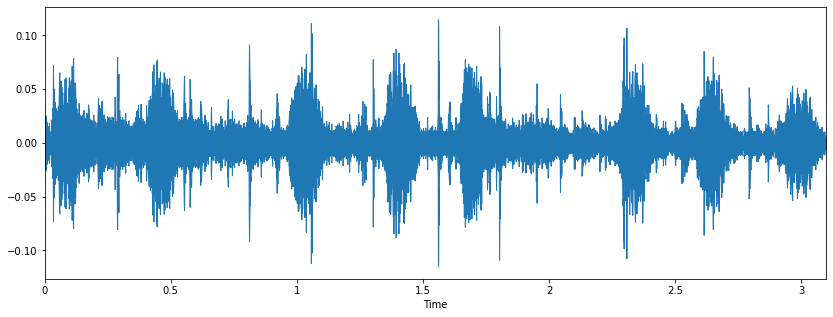

In [41]:
filepath='/content/drive/MyDrive/final year project/UrbanSound8K/audio/fold4/102102-3-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filepath)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filepath)